Heart disease is the number one cause of death worldwide, so, in this notebook we will try to use data science for the good reason i.e., predicting heart disease.To learn how to prevent heart disease we must first learn to reliably detect it.

The dataset is from a study of heart disease that has been open to the public for many years. The study collects various measurements on patient health and cardiovascular statistics, and of course makes patient identities anonymous.

Data is provided courtesy of the [Cleveland Heart Disease Database](http://archive.ics.uci.edu/ml/datasets/statlog+(heart)) via the **UCI Machine Learning repository**.

Aha, D., and Dennis Kibler. **"Instance-based prediction of heart-disease presence with the Cleveland database."** University of California 3.1 (1988): 3-2.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


['heart.csv']


In [2]:
#Reading dataset 
df=pd.read_csv('../input/heart.csv')

In [3]:
# Checking first few entries of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# looking into the summary of the dataset such as mean, standard deviation minimum and maximum values of the attributes
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# checking the number of observation i.e., number of rows and columns/features
df.shape

(303, 14)

In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

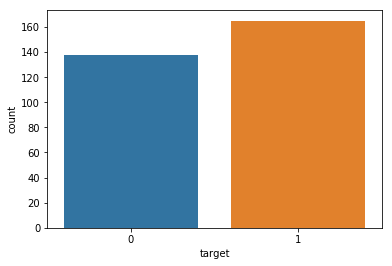

In [8]:
# Checking the number of disease and healthy observations 
sns.countplot(df['target'], label = "Count") 

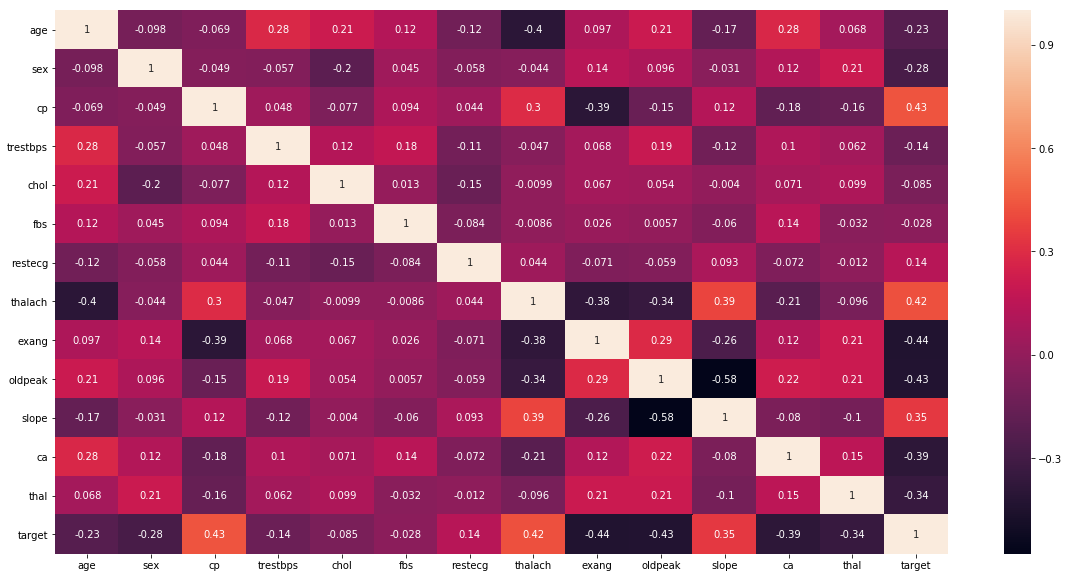

In [9]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(), annot=True)

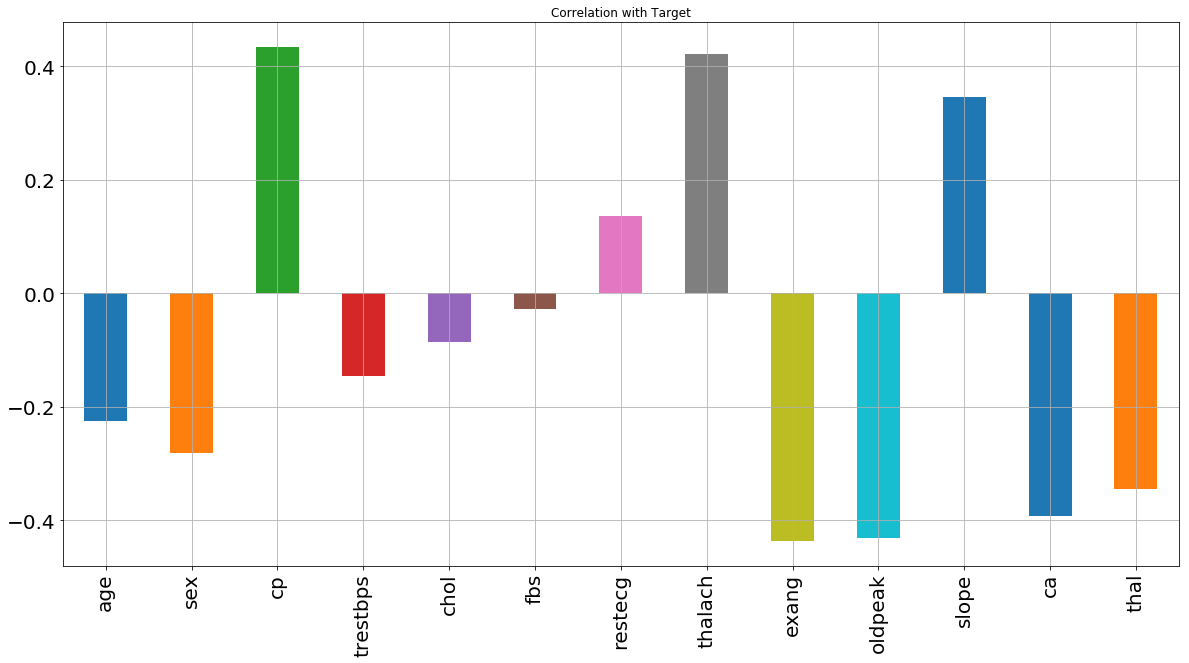

In [10]:
X=df.drop(['target'],axis=1)
X.corrwith(df['target']).plot.bar(
        figsize = (20, 10), title = "Correlation with Target", fontsize = 20,
        rot = 90, grid = True)

In [11]:
y = df['target']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10,stratify=y, random_state=5)

# Normalization

In [13]:
min_train = X_train.min()
range_train = (X_train - min_train).max()
X_train_scaled = (X_train - min_train)/range_train

In [14]:
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

In [15]:
svc_model = SVC(gamma='auto')
svc_model.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
y_predict = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)

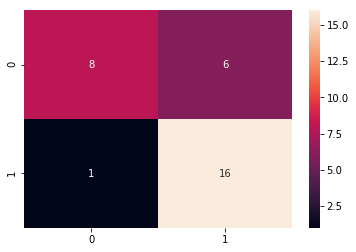

In [17]:
sns.heatmap(cm, annot=True)

In [18]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.89      0.57      0.70        14
           1       0.73      0.94      0.82        17

   micro avg       0.77      0.77      0.77        31
   macro avg       0.81      0.76      0.76        31
weighted avg       0.80      0.77      0.76        31



## Model Improvement - Parameter Tuning

In [19]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear']} 

grid = GridSearchCV(SVC(probability=True),param_grid,refit=True,verbose=4,cv=5,scoring='neg_log_loss')
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=-0.3673421126543625, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=-0.49565646038622835, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=-0.31024563489176743, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=-0.33978835103458266, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=-0.4448127237052742, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV]  C=0.1, gamma=0.1, kernel=linear, score=-0.3681988088559008, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear ...

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, gamma=0.001, kernel=linear, score=-0.31022664940905564, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV]  C=0.1, gamma=0.001, kernel=linear, score=-0.34313369449435815, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV]  C=0.1, gamma=0.001, kernel=linear, score=-0.44451181936741435, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, score=-0.3506651871484081, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, score=-0.4630234653968415, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, score=-0.30490573154570233, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, score=-0.3361431010415611, total=   0.0s
[CV] C=1, gamma=1, k

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.8s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=4)

In [20]:
grid.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}

In [21]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
grid_predictions = grid.predict(X_test_scaled)

In [23]:
cm = confusion_matrix(y_test, grid_predictions)

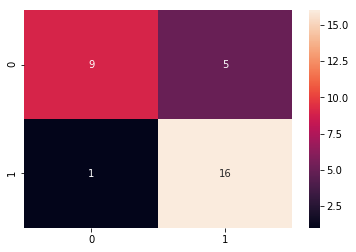

In [24]:
sns.heatmap(cm, annot=True)

In [25]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.90      0.64      0.75        14
           1       0.76      0.94      0.84        17

   micro avg       0.81      0.81      0.81        31
   macro avg       0.83      0.79      0.80        31
weighted avg       0.82      0.81      0.80        31



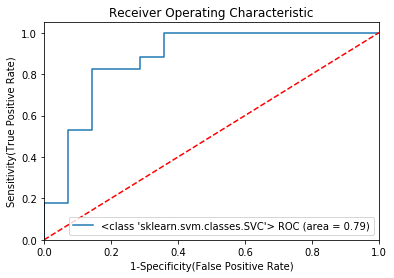

In [26]:
from sklearn import metrics
y_pred=grid.predict(X_test_scaled) # predict the test data
# Compute False postive rate, and True positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, grid.predict_proba(X_test_scaled)[:,1])
# Calculate Area under the curve to display on the plot
auc = metrics.roc_auc_score(y_test,grid.predict(X_test_scaled))
# Now, plot the computed values
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (SVC, auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()